# Make merged shape
Grabs all the lumped shapes and places them in a single combined shapefile for easier plotting of large-domain figures. Retains basic metadata (country, station ID, name) only.

In [1]:
import sys
import pandas as pd
import geopandas as gpd
from pathlib import Path
sys.path.append(str(Path().absolute().parent))
import python_cs_functions as cs

### Config handling

In [2]:
# Specify where the config file can be found
config_file = '../0_config/config.txt'

In [3]:
# Get the required info from the config file
data_path     = cs.read_from_config(config_file,'data_path')

# CAMELS-spat metadata
cs_meta_path  = cs.read_from_config(config_file,'cs_basin_path')
cs_meta_name  = cs.read_from_config(config_file,'cs_meta_name')

# Basin folder
cs_basin_folder = cs.read_from_config(config_file, 'cs_basin_path')

# Merged shape
merged_shape_folder = cs.read_from_config(config_file, 'merged_shp_dir')
merged_shape_name   = cs.read_from_config(config_file, 'merged_shp_name')

In [4]:
# Specify the paths
merged_shape_path = Path(data_path) / cs_basin_folder / merged_shape_folder
merged_shape_path.mkdir(parents=True, exist_ok=True)

basin_path = Path(data_path) / cs_basin_folder / 'basin_data' # This should exist at this point of the workflow

### Data loading

In [5]:
# CAMELS-spat metadata file
cs_meta_path = Path(data_path) / cs_meta_path
cs_meta = pd.read_csv(cs_meta_path / cs_meta_name)

### Create the merged shape

In [27]:
# Loop over the metadata to find the lumped shapes
geometries = []
for ix,row in cs_meta.iterrows():
    
    # Construct the path to the lumped shapefile
    basin_str = '_'.join([row['Country'],row['Station_id']])
    lumped_shp = basin_path / basin_str / 'shapefiles' / 'lumped' / (basin_str + '_lumped.shp')
    
    # Open the shape and get the geometry
    shp = gpd.read_file(lumped_shp)
    geometries.append(shp.geometry.values[0])

In [28]:
# Get the attributes from the metadata
attributes = cs_meta[['Country','Station_id','Station_name','Delineation_confidence','Delineation_notes']].copy()

In [29]:
# Add the geometries
attributes['geometry'] = geometries

In [37]:
# Convert to GeoDataframe
gdf = gpd.GeoDataFrame(attributes)

In [45]:
# Save to file
gdf.to_file(merged_shape_path / merged_shape_name)

C:\Users\wmk934\AppData\Local\Temp\1\ipykernel_17288\2364421600.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(merged_shape_path / merged_shape_name)


### Checks

<Axes: >

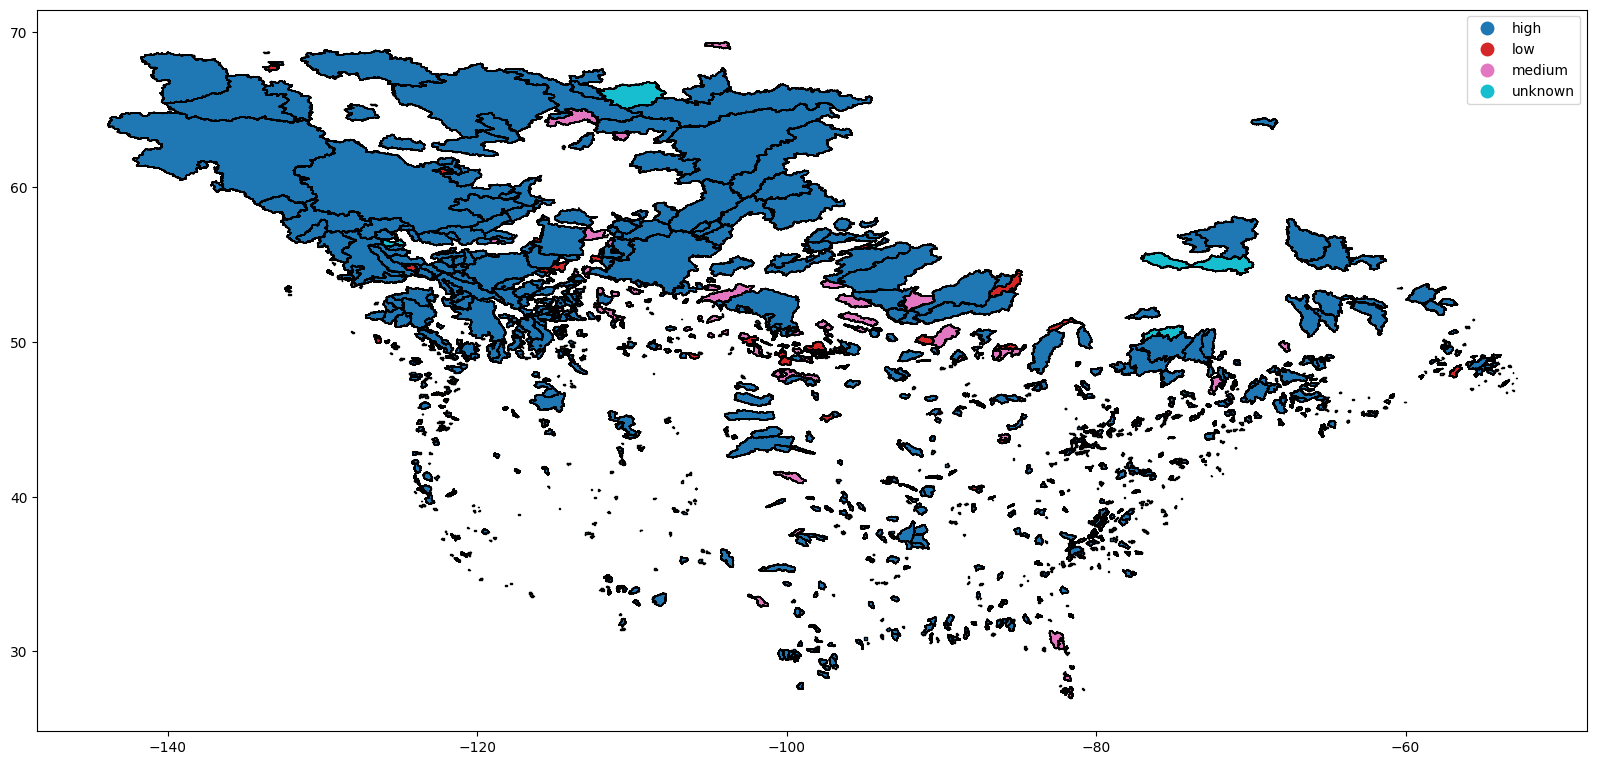

In [56]:
gdf.plot(column = 'Delineation_confidence',
         edgecolor = 'k',
         figsize = (20,20),
         legend = True)